In [62]:
!pip install geopandas
!pip install contextily
!pip install seaborn as sns
!pip install folium
!pip install sodapy
 
import zipfile
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import seaborn as sns
import plotly.express as px
import pandas as pd
from sodapy import Socrata
import string

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [115]:
#!/usr/bin/env python

# make sure to install these packages before running:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(finances.worldbank.org,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("wg3w-h783", limit=1000000)

# Convert to pandas DataFrame
df1 = pd.DataFrame.from_records(results)
df =df1

In [116]:
df=df1

# Data Cleaning

In [117]:
df.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'report_type_code', 'report_type_description',
       'filed_online', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'police_district', 'cad_number', 'intersection', 'cnn',
       'analysis_neighborhood', 'supervisor_district', 'latitude', 'longitude',
       'point', ':@computed_region_jwn9_ihcz', ':@computed_region_26cr_cadq',
       ':@computed_region_qgnn_b9vv', ':@computed_region_nqbw_i6c3',
       ':@computed_region_h4ep_8xdi', ':@computed_region_n4xg_c4py',
       ':@computed_region_jg9y_a9du'],
      dtype='object')

In [118]:
df.drop(columns=[':@computed_region_jwn9_ihcz', ':@computed_region_26cr_cadq', ':@computed_region_qgnn_b9vv',
                ':@computed_region_nqbw_i6c3', ':@computed_region_h4ep_8xdi',':@computed_region_n4xg_c4py',
                ':@computed_region_jg9y_a9du', 'point'], inplace = True)

In [119]:
# df['volume'].to_numeric()
# df.dtypes

df['incident_datetime']=pd.to_datetime(df['incident_datetime'], errors = 'coerce')
# df['incident_day_of_week']=pd.to_datetime(df['incident_day_of_week'], errors = 'coerce')
#df['incident_time']=pd.to_datetime(df['incident_time'], errors = 'coerce')
#df['incident_year']=pd.to_datetime(df['incident_year'], errors = 'coerce')
df['incident_date']=pd.to_datetime(df['incident_date'], errors = 'coerce')
df['report_datetime']=pd.to_datetime(df['report_datetime'], errors = 'coerce')

# df[["incident_datetime", "incident_day_of_week", "incident_time",
#    'incident_year', 'incident_date', 'report_datetime']] = df["incident_datetime", "incident_day_of_week", "incident_time",
#    'incident_year', 'incident_date', 'report_datetime'].apply(pd.to_datetime)





In [120]:
df.dtypes

incident_datetime          datetime64[ns]
incident_date              datetime64[ns]
incident_time                      object
incident_year                      object
incident_day_of_week               object
report_datetime            datetime64[ns]
row_id                             object
incident_id                        object
incident_number                    object
report_type_code                   object
report_type_description            object
filed_online                       object
incident_code                      object
incident_category                  object
incident_subcategory               object
incident_description               object
resolution                         object
police_district                    object
cad_number                         object
intersection                       object
cnn                                object
analysis_neighborhood              object
supervisor_district                object
latitude                          

In [121]:
def o_str(value):
    return str(value)

In [122]:
def o_date(value):
    return str(value)

In [123]:
def o_numeric(value):
    return float(value)

In [132]:
df['incident_id']=df['incident_id'].apply(o_numeric)
df['row_id']=df['row_id'].apply(o_numeric)
df['incident_code']=df['incident_code'].apply(o_numeric)
df['incident_number']=df['incident_number'].apply(o_numeric)
# df['incident_year']=df['incident_year'].apply(o_numeric)
df['cad_number']=df['cad_number'].apply(o_numeric)
df['cnn']=df['cnn'].apply(o_numeric)

df['report_type_description']=df['report_type_description'].apply(o_str)
df['incident_category']=df['incident_category'].apply(o_str)
df['incident_subcategory']=df['incident_subcategory'].apply(o_str)
df['resolution']=df['resolution'].apply(o_str)
df['police_district']=df['police_district'].apply(o_str)
df['analysis_neighborhood']=df['analysis_neighborhood'].apply(o_str)

df['latitude']=df['latitude'].apply(o_numeric)
df['longitude']=df['longitude'].apply(o_numeric)


In [133]:
df.resolution.unique()

array(['Open or Active', 'Cite or Arrest Adult', 'Exceptional Adult',
       'Unfounded'], dtype=object)

In [134]:
df.police_district.unique()

array(['Southern', 'Out of SF', 'Central', 'Mission', 'Richmond',
       'Ingleside', 'Park', 'Northern', 'Bayview', 'Tenderloin',
       'Taraval'], dtype=object)

In [135]:
df.report_type_description.unique()

array(['Coplogic Initial', 'Vehicle Supplement', 'Initial Supplement',
       'Initial', 'Vehicle Initial', 'Coplogic Supplement'], dtype=object)

In [136]:
df.analysis_neighborhood.unique()

array(['nan', 'Excelsior', 'Russian Hill', 'Lone Mountain/USF',
       'Pacific Heights', 'Bayview Hunters Point', 'Glen Park', 'Mission',
       'Tenderloin', 'Hayes Valley', 'Western Addition', 'Outer Mission',
       'Marina', 'South of Market', 'Japantown', 'McLaren Park',
       'Presidio Heights', 'Mission Bay', 'Nob Hill', 'North Beach',
       'Financial District/South Beach', 'West of Twin Peaks',
       'Chinatown', 'Haight Ashbury', 'Castro/Upper Market',
       'Sunset/Parkside', 'Potrero Hill', 'Lakeshore', 'Outer Richmond',
       'Inner Sunset', 'Twin Peaks', 'Oceanview/Merced/Ingleside',
       'Portola', 'Presidio', 'Bernal Heights', 'Golden Gate Park',
       'Noe Valley', 'Visitacion Valley', 'Inner Richmond',
       'Treasure Island', 'Lincoln Park', 'Seacliff', 'null'],
      dtype=object)

In [137]:
df['filed_online'].fillna('In Person',inplace = True)

In [138]:
df.dtypes

incident_datetime          datetime64[ns]
incident_date              datetime64[ns]
incident_time                      object
incident_year                      object
incident_day_of_week               object
report_datetime            datetime64[ns]
row_id                            float64
incident_id                       float64
incident_number                   float64
report_type_code                   object
report_type_description            object
filed_online                       object
incident_code                     float64
incident_category                  object
incident_subcategory               object
incident_description               object
resolution                         object
police_district                    object
cad_number                        float64
intersection                       object
cnn                               float64
analysis_neighborhood              object
supervisor_district                object
latitude                          

In [139]:
#Checking null values for each column
df.isnull().sum()

incident_datetime              0
incident_date                  0
incident_time                  0
incident_year                  0
incident_day_of_week           0
report_datetime                0
row_id                         0
incident_id                    0
incident_number                0
report_type_code               0
report_type_description        0
filed_online                   0
incident_code                  0
incident_category              0
incident_subcategory           0
incident_description           0
resolution                     0
police_district                0
cad_number                     0
intersection                   0
cnn                            0
analysis_neighborhood          0
supervisor_district            0
latitude                   35337
longitude                  35337
dtype: int64

In [140]:
#Since over 70% of the data is null drop this columns
# df.drop(columns = ['incident_day_of_week'], inplace=True)
df.cad_number.fillna('0', inplace = True)
df.intersection.fillna('0', inplace = True)
df.cnn.fillna('0', inplace = True)
df.supervisor_district.fillna('0', inplace = True)
#df.latitude.fillna('0', inplace = True)
#df.longitude.fillna('0', inplace = True)

df['latitude'].fillna(float(df['latitude'].mean()), inplace=True)
df['longitude'].fillna(float(df['longitude'].mean()), inplace=True)

df.analysis_neighborhood.fillna('0', inplace = True)

In [141]:
#Reindexing and finding shape of dataframe
df.iloc[:].reindex()
df.shape

(667578, 25)

In [142]:
#Checking datatypes of the dataframe
df.dtypes

incident_datetime          datetime64[ns]
incident_date              datetime64[ns]
incident_time                      object
incident_year                      object
incident_day_of_week               object
report_datetime            datetime64[ns]
row_id                            float64
incident_id                       float64
incident_number                   float64
report_type_code                   object
report_type_description            object
filed_online                       object
incident_code                     float64
incident_category                  object
incident_subcategory               object
incident_description               object
resolution                         object
police_district                    object
cad_number                        float64
intersection                       object
cnn                               float64
analysis_neighborhood              object
supervisor_district                object
latitude                          

# Exploratory Data Analysis

In [143]:
import seaborn as sns

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



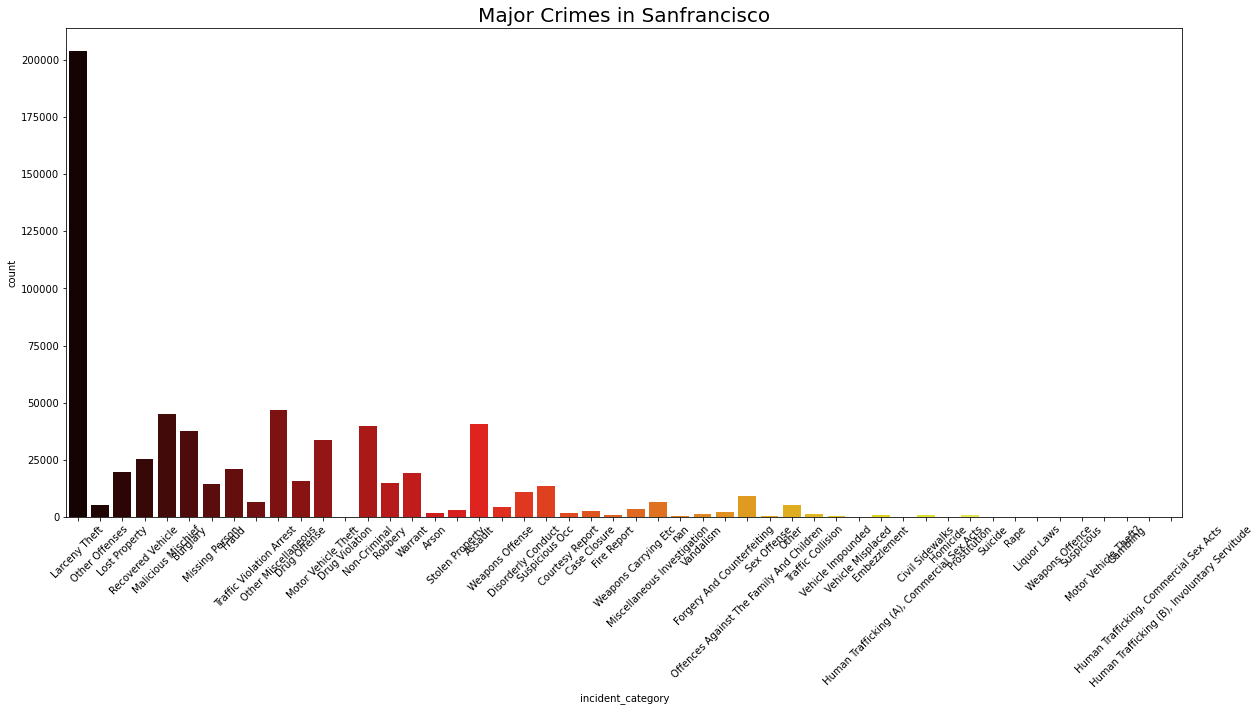

In [144]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('fast')

sns.countplot(df['incident_category'], palette = 'hot')

plt.title('Major Crimes in Sanfrancisco', fontweight = 20, fontsize = 20)
plt.xticks(rotation = 45)
plt.show()

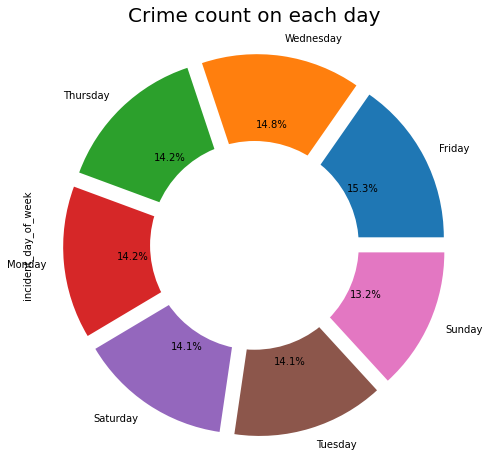

In [145]:
df['incident_day_of_week'].value_counts().plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1), autopct='%1.1f%%')

plt.title('Crime count on each day',fontsize = 20)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.xticks(rotation = 90)
plt.show()

In [146]:
# read the data into a data frame
# dfSF = pd.read_csv("Police_Department_Incidents_2016.csv", header=0, index_col=0)
#for col in dfSF.columns: 
#    print(col)
# dfSF.PdDistrict.unique()

# Get a count of the crimes by neighborhood, returns a series
crime_neighbourhood = df.police_district.value_counts()
# Stick it into a data frame.
neighbour_df = pd.DataFrame(crime_neighbourhood)

# Set up the data frame with the required structure.
neighbour_df.index.name = 'neighborhood'
neighbour_df.reset_index(inplace=True)
neighbour_df.rename(columns={'police_district': 'No of Crimes'}, inplace=True)
neighbour_df

neighborhood  No of Crimes
0       Central         99736
1      Northern         90744
2       Mission         84062
3      Southern         80617
4    Tenderloin         63942
5       Bayview         59006
6     Ingleside         50433
7       Taraval         46803
8      Richmond         41629
9          Park         31047
10    Out of SF         19559

# Plotting the incident hotspots on map of San Francisco using cartopy

In [181]:
import cartopy.crs as crs
import cartopy

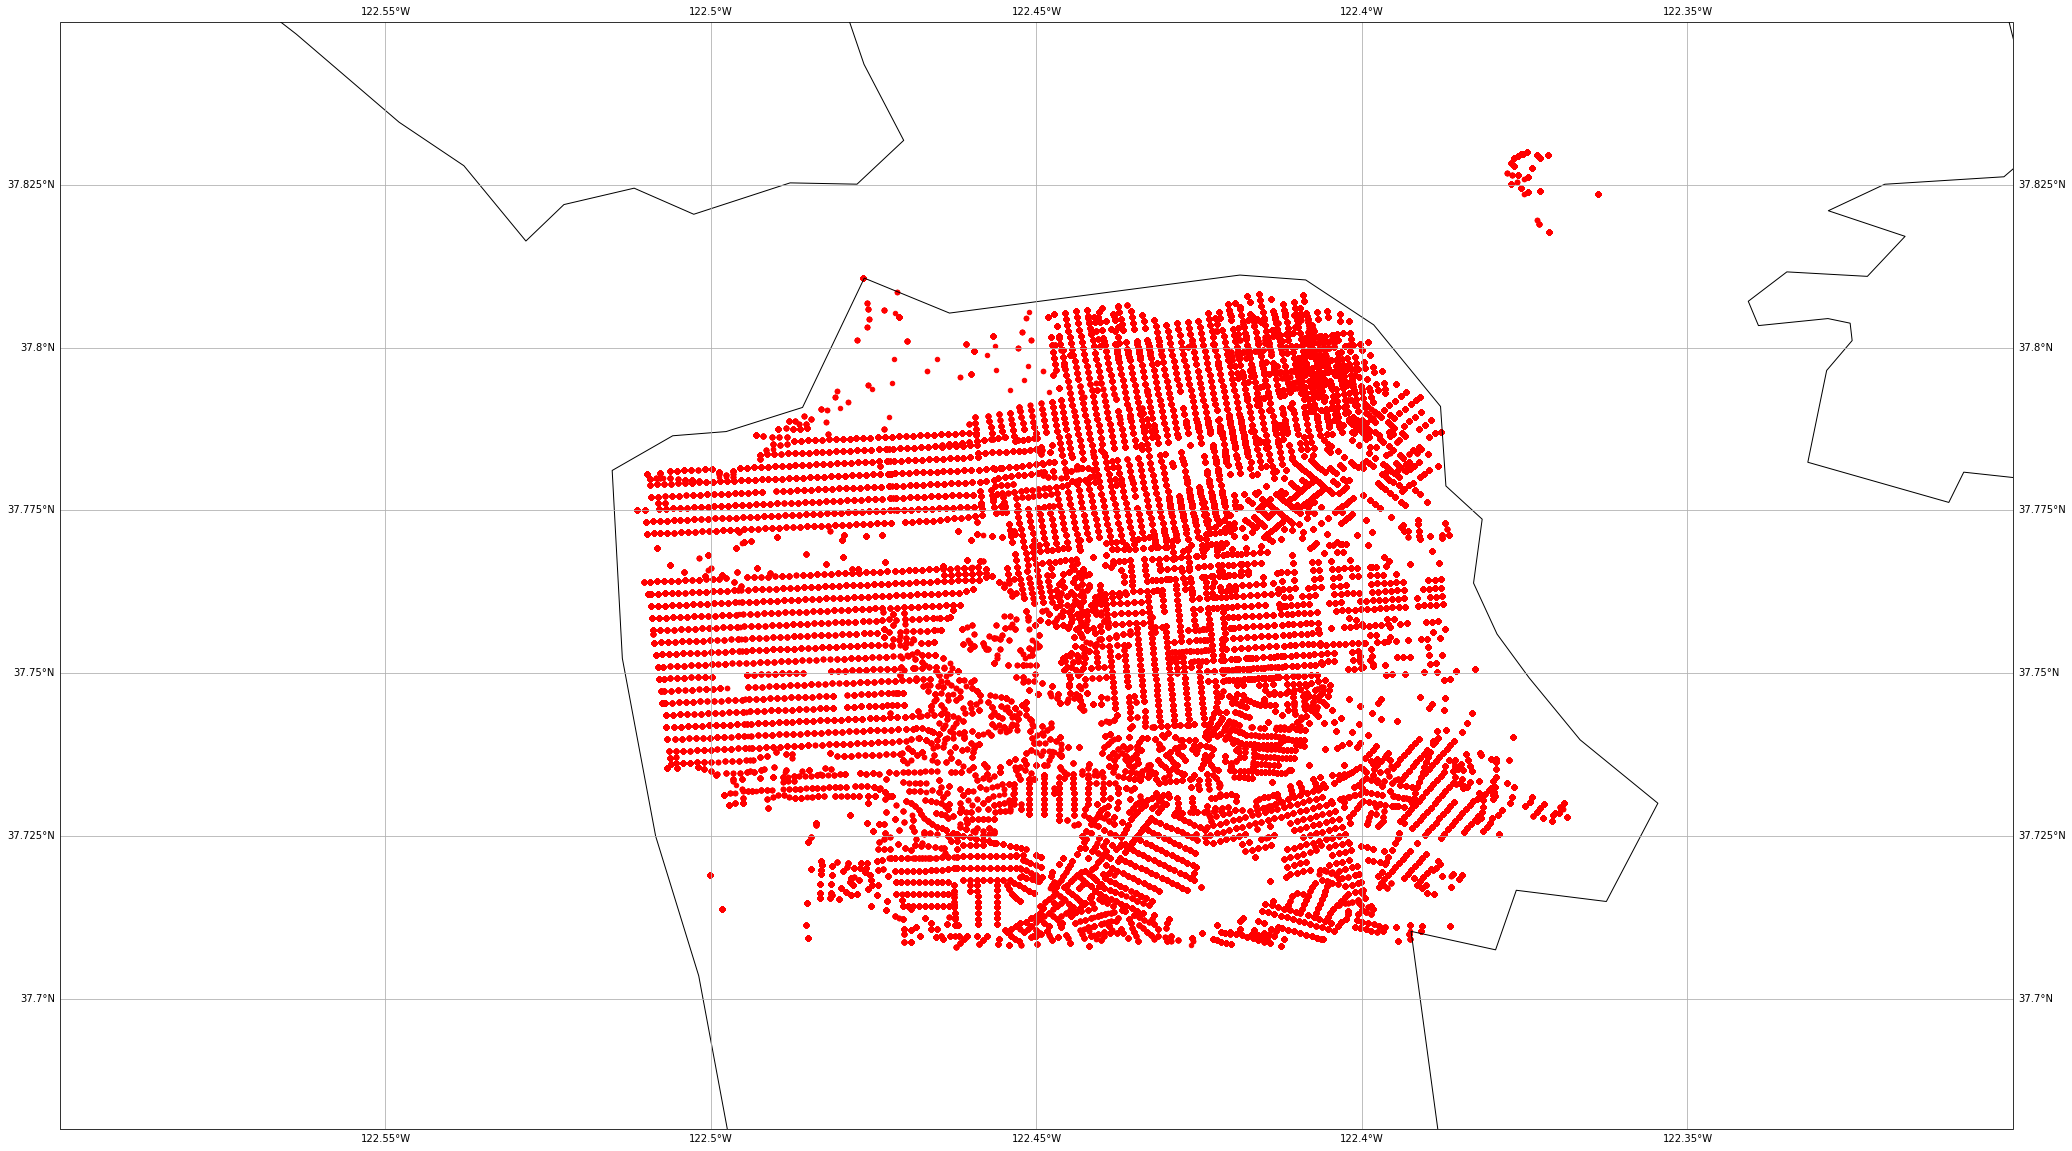

In [180]:
fig, ax = plt.subplots(figsize=(35,35))
ax = plt.axes(projection=crs.PlateCarree())
ax.coastlines()
ax.set_extent([-122.6, -122.3, 37.68, 37.85])
ax.gridlines(draw_labels=True)

plt.scatter(x=df.longitude, y=df.latitude, 
            color="red", s=20, transform=crs.PlateCarree())


plt.show()

In [147]:
# Read in the geojson file with the neighborhoods and lat/long 
sf_geo  = r'https://cocl.us/sanfran_geojson'

# Create the map, centered on San Francisco with zoom level 12. 
SF_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add the choropleth to the map, with the wanted options.
SF_map.choropleth(
    geo_data=sf_geo,
    name='Choropleth',
    data = neighbour_df,
    columns=['neighborhood','No of Crimes'], 
    key_on='feature.properties.DISTRICT', 
    fill_color = 'YlOrRd',
    fill_opacity = 0.3,
    line_opacity = 0.2,
    legend_name = 'Crimes in SF'
)

# creating a state indexed version of the dataframe so we can lookup values
# neighbor_index = neighbour_df.set_index('neighborhood')
  
# looping thru the geojson object and adding a new property(unemployment)
# and assigning a value from our dataframe
# for s in cp.geojson.data['features']:
#     s['properties']['unemployment'] = state_data_indexed.loc[s['id'], 'Unemployment']
  
#   # and finally adding a tooltip/hover to the choropleth's geojson
# folium.GeoJsonTooltip(['name', 'unemployment']).add_to(cp.geojson)
  
# folium.LayerControl().add_to(m)

# folium.LayerControl().add_to(SF_map)
SF_map

/opt/conda/lib/python3.8/site-packages/folium/folium.py:407: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [148]:
#import plotly.validators.blayout
import seaborn as sns
import plotly.express as px

In [149]:
# Download shapefile data for SF
! wget https://www2.census.gov/geo/tiger/TIGER2017//ROADS/tl_2017_06075_roads.zip
    
# Unzip shapefiles into shapefiles folder using unzip
with zipfile.ZipFile('tl_2017_06075_roads.zip', 'r') as zip_ref:
    zip_ref.extractall('shapefiles')

--2022-12-01 17:13:45--  https://www2.census.gov/geo/tiger/TIGER2017//ROADS/tl_2017_06075_roads.zip
Resolving www2.census.gov (www2.census.gov)... 23.219.236.170, 2600:1407:1800:38b::208c, 2600:1407:1800:3a2::208c
Connecting to www2.census.gov (www2.census.gov)|23.219.236.170|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2017_06075_roads.zip.2’

tl_2017_06075_roads     [ <=>                ] 586.77K  --.-KB/s    in 0.03s   

2022-12-01 17:13:45 (19.0 MB/s) - ‘tl_2017_06075_roads.zip.2’ saved [600849]



In [150]:
# # Import shapefile as GeoDataFrame
geo_df = gpd.read_file('shapefiles/tl_2017_06075_roads.shp')

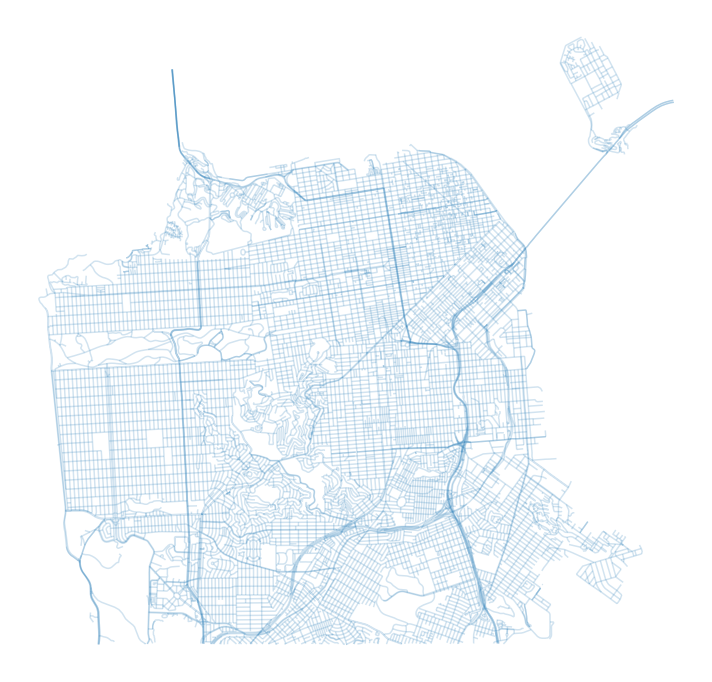

In [151]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .2)
# Turn off axis
ax.set_axis_off()
# Save image
fig.tight_layout()
plt.savefig('shapefile_plot.png');

In [152]:
geo_df.crs
# output: {'init': 'epsg:4269'}

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [153]:
geo_df = geo_df.to_crs(epsg=3857)


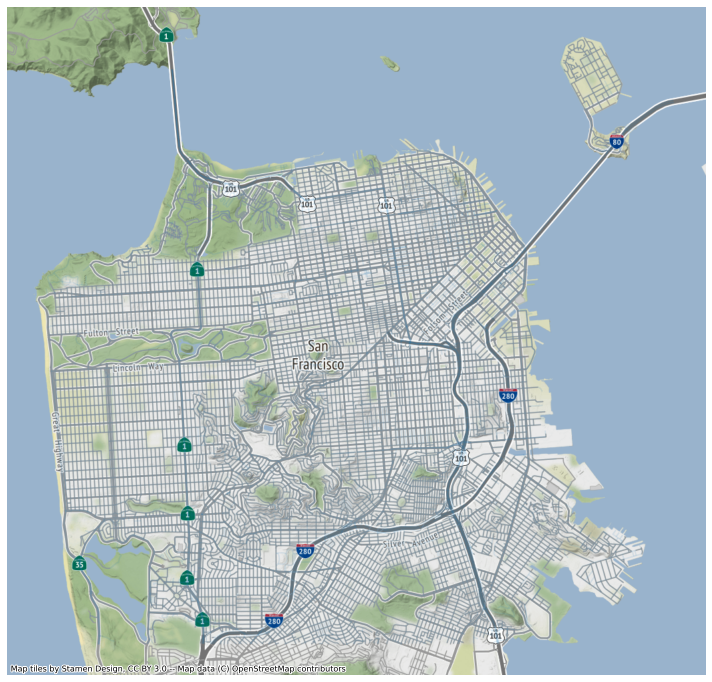

In [154]:
# Initialize our plot
fig, ax = plt.subplots(figsize=(10,10))
# Plot our SF GeoDataFrame
geo_df.plot(ax=ax, alpha = .1)
# Add in a background using contextily
ctx.add_basemap(ax)
# Turn off axis
ax.set_axis_off()
fig.tight_layout()
plt.savefig('contextily_plot.png');

In [155]:
#read the data into a data frame
dfSF = pd.read_csv("Police_Department_Incidents_2016.csv", header=0, index_col=0)
for col in dfSF.columns: 
   print(col)
dfSF.PdDistrict.unique()

#Get a count of the crimes by neighborhood, returns a series
crime_neighbourhood = df.police_district.value_counts()
# Stick it into a data frame.
neighbour_df = pd.DataFrame(neighborhoodCrimes)

# Set up the data frame with the required structure.
neighbour_df.index.name = 'neighborhood'
neighbour_df.reset_index(inplace=True)
neighbour_df.rename(columns={'police_district': 'No of Crimes'}, inplace=True)
neighbour_df

FileNotFoundError: [Errno 2] No such file or directory: 'Police_Department_Incidents_2016.csv'

In [156]:
# Read in the geojson file with the neighborhoods and lat/long 
sf_geo = r'san-francisco.geojson'
# Create the map, centered on San Francisco with zoom level 12. 
SF_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add the choropleth to the map, with the wanted options.
SF_map.choropleth(
    geo_data=sf_geo,
    name='Choropleth',
    data = dfNeighbor,
    columns=['neighborhood','crimecount'], 
    key_on='feature.properties.DISTRICT', 
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'Crime Rate in SF'
)

folium.LayerControl().add_to(SF_map)
SF_map

NameError: name 'dfNeighbor' is not defined

In [157]:
df.shape

(667578, 25)

In [158]:
import plotly.express as px

# Number of crimes based on category over the years

In [159]:
x = df.groupby(['incident_category', 'incident_year'])[['incident_year']].count()
x.rename(columns={"incident_year":"count"}, inplace=True)
crime_by_years = x.reset_index()
crime_by_years

incident_category incident_year  count
0               Arson          2018    366
1               Arson          2019    313
2               Arson          2020    429
3               Arson          2021    433
4               Arson          2022    371
..                ...           ...    ...
241               nan          2018     10
242               nan          2019      2
243               nan          2020    306
244               nan          2021    153
245               nan          2022     88

[246 rows x 3 columns]

In [160]:
df['incident_category'] = df['incident_category'].replace(['Motor Vehicle Theft?', 'Other Miscellaneous', 'Other Offenses', 'Weapons Offence'], 
                                                          ['Motor Vehicle Theft', 'Other', 'Other', 'Weapons Offense'])

df['incident_subcategory'] = df['incident_subcategory'].replace(['Motor Vehicle Theft?', 'Other Miscellaneous', 'Other Offenses', 'Weapons Offence'], 
                                                          ['Motor Vehicle Theft', 'Other', 'Other', 'Weapons Offense'])

In [161]:
x = df.groupby(['incident_category', 'incident_year'])[['incident_year']].count()
x.rename(columns={"incident_year":"count"}, inplace=True)
crime_by_years = x.reset_index()
crime_by_years

incident_category incident_year  count
0               Arson          2018    366
1               Arson          2019    313
2               Arson          2020    429
3               Arson          2021    433
4               Arson          2022    371
..                ...           ...    ...
221               nan          2018     10
222               nan          2019      2
223               nan          2020    306
224               nan          2021    153
225               nan          2022     88

[226 rows x 3 columns]

In [162]:
fig = px.bar(crime_by_years, x='incident_year', y='count', color='incident_category', 
            title="Counts of crimes according to categories grouped over the years",
            labels={'incident_year':'Year', 'count':'Count of crimes'})
fig.show('notebook')

In [177]:
import plotly.express as px
fig = px.treemap(df1, path=[px.Constant("all"), 'incident_category', 'incident_subcategory'], values='count')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Average time difference between incident & report time over the years

In [163]:
df.dtypes

incident_datetime          datetime64[ns]
incident_date              datetime64[ns]
incident_time                      object
incident_year                      object
incident_day_of_week               object
report_datetime            datetime64[ns]
row_id                            float64
incident_id                       float64
incident_number                   float64
report_type_code                   object
report_type_description            object
filed_online                       object
incident_code                     float64
incident_category                  object
incident_subcategory               object
incident_description               object
resolution                         object
police_district                    object
cad_number                        float64
intersection                       object
cnn                               float64
analysis_neighborhood              object
supervisor_district                object
latitude                          

In [164]:
df['time_difference'] = round(((df['report_datetime'] - df['incident_datetime']).dt.total_seconds() / 60 / 60 / 24),0)
df[['time_difference']]

time_difference
0                   1.0
1                   0.0
2                   0.0
3                   0.0
4                   0.0
...                 ...
667573              0.0
667574             59.0
667575              0.0
667576              0.0
667577              0.0

[667578 rows x 1 columns]

In [165]:
x = df.groupby(['incident_year'])['time_difference'].mean()
time_diff_by_year = x.reset_index()
time_diff_by_year

incident_year  time_difference
0          2018        10.078363
1          2019         7.784943
2          2020        10.429776
3          2021         6.787044
4          2022         3.778824

In [166]:
fig = px.line(time_diff_by_year, x='incident_year', y='time_difference',
              title="Average Time difference between incident and report time in days over the years",
              labels={'incident_year':'Year', 'time_difference':'Time difference in days'})
fig.show('notebook')

In [176]:
df1 = df.groupby(['incident_category','incident_subcategory']).count().reset_index()
df1.rename(columns = {'incident_id':'count'}, inplace = True)
df1.head()

incident_category   incident_subcategory  incident_datetime  incident_date  \
0             Arson                  Arson               1912           1912   
1           Assault     Aggravated Assault              15388          15388   
2           Assault         Simple Assault              25166          25166   
3          Burglary  Burglary - Commercial               4694           4694   
4          Burglary   Burglary - Hot Prowl               4738           4738   

   incident_time  incident_year  incident_day_of_week  report_datetime  \
0           1912           1912                  1912             1912   
1          15388          15388                 15388            15388   
2          25166          25166                 25166            25166   
3           4694           4694                  4694             4694   
4           4738           4738                  4738             4738   

   row_id  count  ...  police_district  cad_number  intersection    cnn  \
0    1912   1912  ...             1912        1912          1912   1912   
1   15388  15388  ...            15388       15388         15388  15388   
2   25166  25166  ...            25166       25166         25166  25166   
3    4694   4694  ...             4694        4694          4694   4694   
4    4738   4738  ...             4738        4738          4738   4738   

   analysis_neighborhood  supervisor_district  latitude  longitude  \
0                   1912                 1912      1912       1912   
1                  15388                15388     15388      15388   
2                  25166                25166     25166      25166   
3                   4694                 4694      4694       4694   
4                   4738                 4738      4738       4738   

   time_difference  incident_time_category  
0             1912                    1912  
1            15388                   15388  
2            25166                   25166  
3             4694                    4694  
4             4738                    4738  

[5 rows x 27 columns]

# Plotting incident counts based on time of the day it occurs

In [171]:
df['incident_time']=df['incident_time'].astype('string')
df['incident_time'].dtypes
df

incident_datetime incident_date incident_time incident_year  \
0      2021-07-25 00:00:00    2021-07-25         00:00          2021   
1      2022-06-28 23:58:00    2022-06-28         23:58          2022   
2      2022-03-11 10:30:00    2022-03-11         10:30          2022   
3      2021-05-15 17:47:00    2021-05-15         17:47          2021   
4      2022-06-28 17:22:00    2022-06-28         17:22          2022   
...                    ...           ...           ...           ...   
667573 2022-11-28 16:50:00    2022-11-28         16:50          2022   
667574 2022-10-01 12:00:00    2022-10-01         12:00          2022   
667575 2022-11-29 11:00:00    2022-11-29         11:00          2022   
667576 2022-11-29 19:00:00    2022-11-29         19:00          2022   
667577 2022-11-29 21:16:00    2022-11-29         21:16          2022   

       incident_day_of_week     report_datetime        row_id  incident_id  \
0                    Sunday 2021-07-25 13:41:00  1.057189e+11    1057189.0   
1                   Tuesday 2022-06-28 23:58:00  1.165544e+11    1165543.0   
2                    Friday 2022-03-11 20:03:00  1.130481e+11    1130480.0   
3                  Saturday 2021-05-15 17:47:00  1.030518e+11    1030518.0   
4                   Tuesday 2022-06-28 17:22:00  1.165351e+11    1165351.0   
...                     ...                 ...           ...          ...   
667573               Monday 2022-11-28 21:09:00  1.219532e+11    1219532.0   
667574             Saturday 2022-11-29 18:30:00  1.219703e+11    1219703.0   
667575              Tuesday 2022-11-29 11:28:00  1.219621e+11    1219620.0   
667576              Tuesday 2022-11-29 19:00:00  1.219715e+11    1219714.0   
667577              Tuesday 2022-11-29 21:16:00  1.219759e+11    1219758.0   

        incident_number report_type_code  ...            resolution  \
0           216105573.0               II  ...        Open or Active   
1           220264913.0               VS  ...        Open or Active   
2           226040232.0               II  ...        Open or Active   
3           210183345.0               VS  ...        Open or Active   
4           220361741.0               VS  ...        Open or Active   
...                 ...              ...  ...                   ...   
667573      220819057.0               II  ...        Open or Active   
667574      220804876.0               IS  ...        Open or Active   
667575      220820236.0               II  ...        Open or Active   
667576      220816019.0               IS  ...        Open or Active   
667577      220821836.0               II  ...  Cite or Arrest Adult   

       police_district   cad_number                              intersection  \
0             Southern          0.0                                         0   
1            Out of SF          0.0                                         0   
2              Central          0.0                                         0   
3            Out of SF          0.0                                         0   
4            Out of SF          0.0                                         0   
...                ...          ...                                       ...   
667573        Northern  223322987.0                  FRANKLIN ST \ LOMBARD ST   
667574         Mission          0.0                      28TH ST \ SANCHEZ ST   
667575      Tenderloin  223331171.0                       EDDY ST \ LARKIN ST   
667576        Richmond  223311980.0                        ANZA ST \ 06TH AVE   
667577      Tenderloin  223333398.0  STEVENSON ST \ 07TH ST \ ODD FELLOWS WAY   

               cnn analysis_neighborhood supervisor_district   latitude  \
0              0.0                   nan                   0  37.769252   
1              0.0                   nan                   0  37.769252   
2              0.0                   nan                   0  37.769252   
3              0.0                   nan                   0  37.769252   
4     

In [172]:
df['incident_time']=df['incident_time'].str.split(':',expand=True)[0]
df['incident_time']=df['incident_time'].astype(int)

In [173]:
df['incident_time']=df['incident_time'].astype('string')
df['incident_time'].dtypes
df



df['incident_time']=df['incident_time'].str.split(':',expand=True)[0]
df['incident_time']=df['incident_time'].astype(int)



df['incident_time_category']='nullllll'
df['incident_time_category'].dtypes


dtype('O')

In [174]:
# 0-6 : Early Morning, 7-12: Morning, 12- 18: Evening, 18-24: Night
 

def category(x):
    if 0<=x<=6:
        return 'Early Morning'
    elif 7<=x<12:
        return 'Morning'
    elif 12<=x<18:
        return 'Evening'
    elif 18<=x<24:
        return 'Night'
 

df['incident_time_category'] = df['incident_time'].apply(category)
 


df_count = df.groupby(['incident_time_category']).count()
df_count
 


df_count = df.groupby(['incident_time_category']).count()
df_num=pd.DataFrame(df_count)
df_num.reset_index(inplace=True)
 
fig = plt.figure(figsize = (10, 7))
fig = px.bar(df_num.sort_values( 'incident_time',ascending = False), 
x='incident_time_category', 
y='incident_time',
labels = {"incident_time_category":"Time when the incident occured", "incident_time":"Number of incidences" }, 
title = "Distribution of incidences as per the time of its occurance",
color='incident_time_category', 
color_discrete_map={'Evening': 'red','Night': 'blue','Morning': 'green','Early Morning': 'orange'})
 
fig.show()

<Figure size 720x504 with 0 Axes>